In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
df = pd.read_csv('/Users/saiakhileshveldi/Downloads/Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [175]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [176]:
df.shape

(246, 14)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [178]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Dividing the dataset into two parts

In [179]:
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [180]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [181]:
df["Region"] = df["Region"].astype(int)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [183]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [184]:
df = df.dropna().reset_index(drop=True)

In [185]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [186]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [187]:
df = df.drop(122).reset_index(drop=True)

In [188]:
df.shape

(243, 15)

In [189]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [190]:
# Using Str strip to remove the extra spaces in the column names
df.columns = df.columns.str.strip()

In [191]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [192]:
df[[ 'month','day', 'year', 'Temperature', 'RH', 'Ws']] = df[[ 'month','day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [194]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [196]:
#Through python code - convert the remaining columns to float except "Classes" column
# objects = [features for features in df.columns if df[features].dtypes == 'O']
# for i in objects:
# if i! = "Classes":
# df[i] = df[i].astype(float)

In [197]:
df.to_csv('/Users/saiakhileshveldi/Downloads/Algerian_forest_fires_dataset_UPDATE_cleaned.csv', index=False)

# Exploratory Data Analysis

In [198]:
df_copy = df.drop(['day', 'month', 'year'], axis = 1)

In [199]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [200]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [201]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [202]:
df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [203]:
df_copy['Classes'].replace('not fire', 0, inplace = True)
df_copy['Classes'].replace('fire', 1, inplace = True)

In [204]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

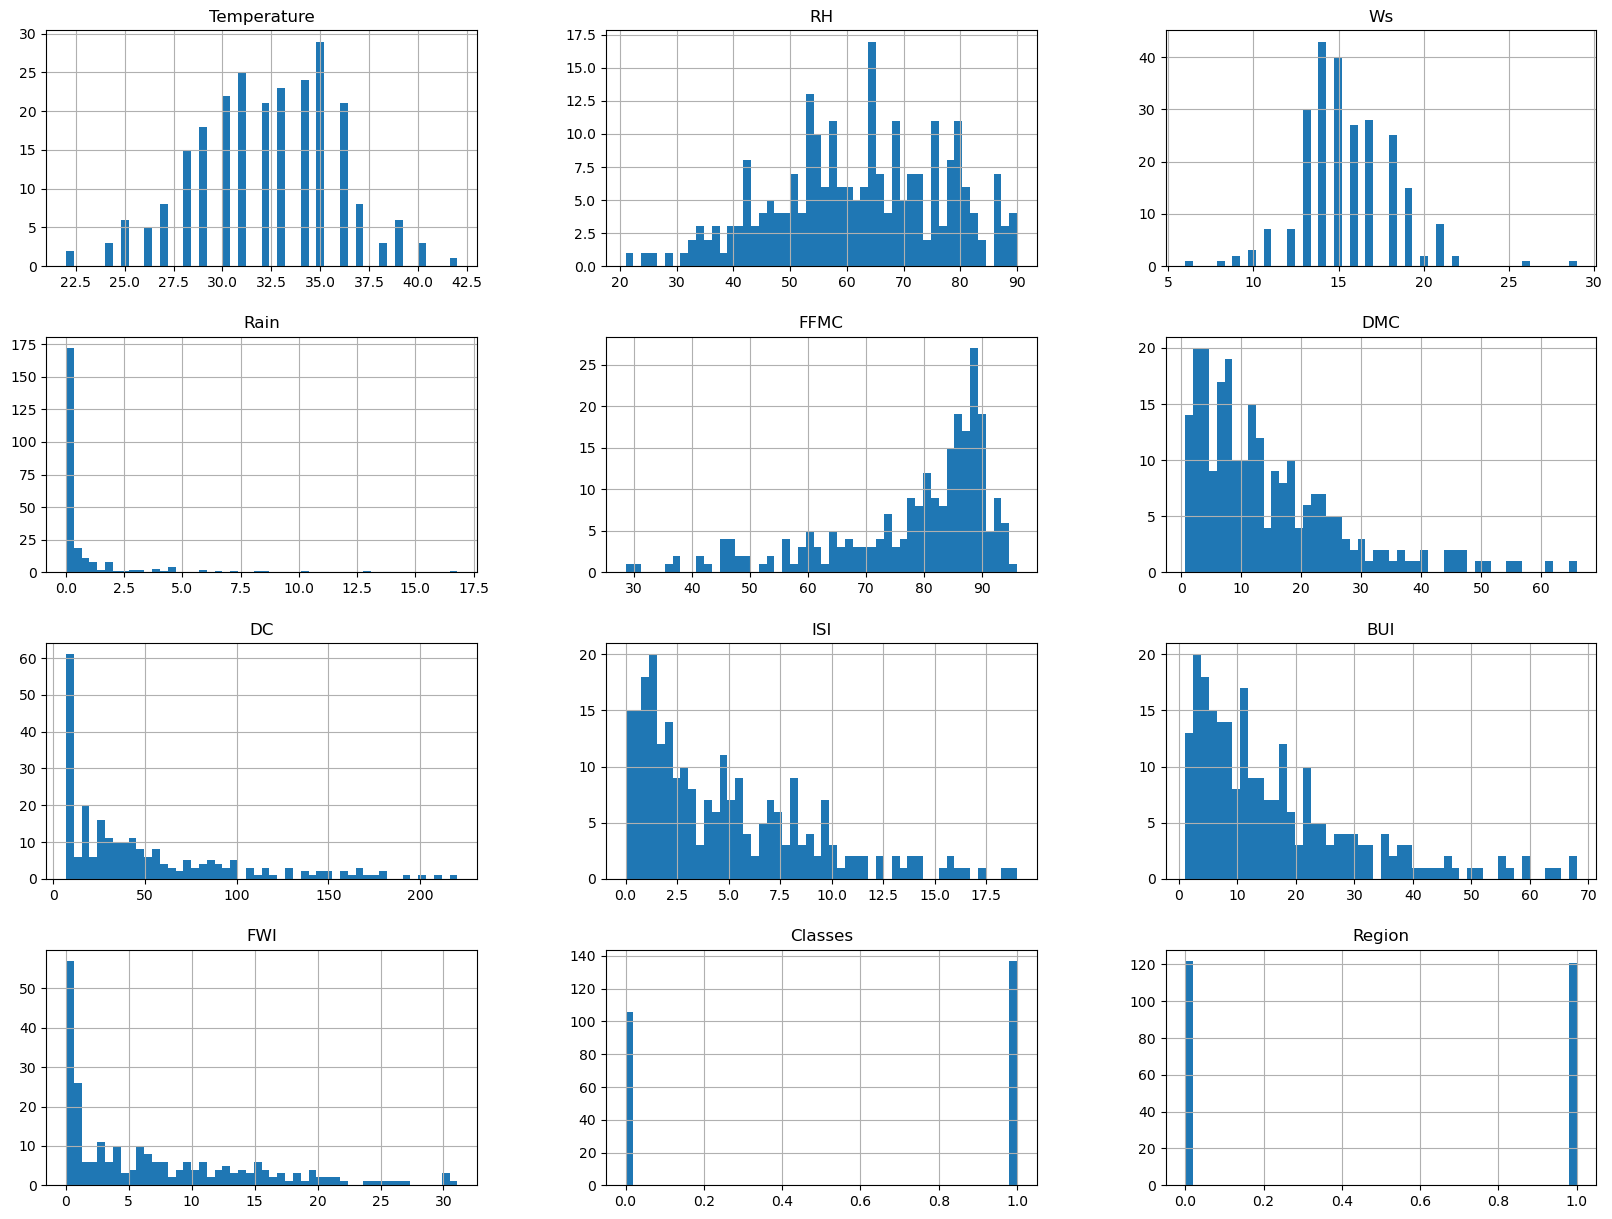

In [205]:
df_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

# Correlation

In [206]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

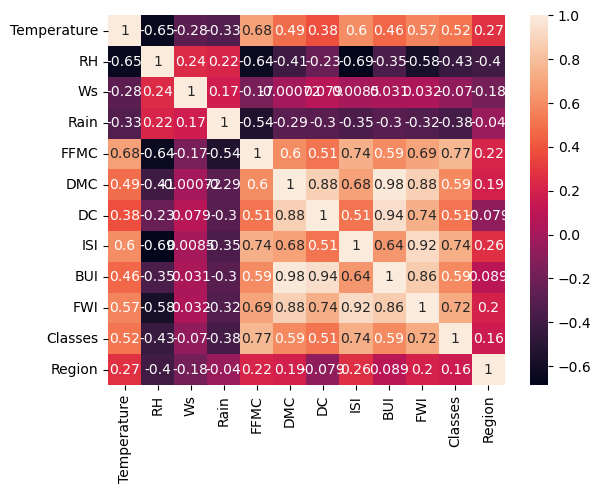

In [207]:
sns.heatmap(df_copy.corr(), annot = True)

<Axes: >

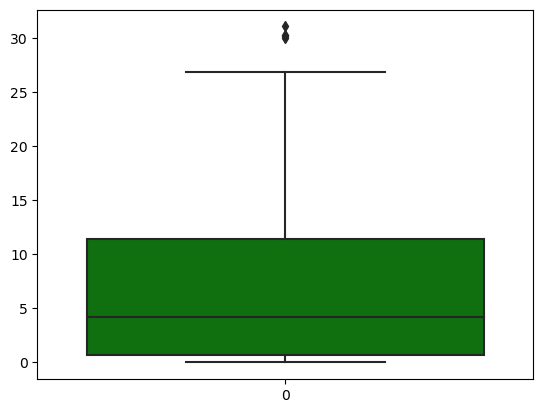

In [208]:
sns.boxplot(df_copy['FWI'], color = 'green')

<Axes: >

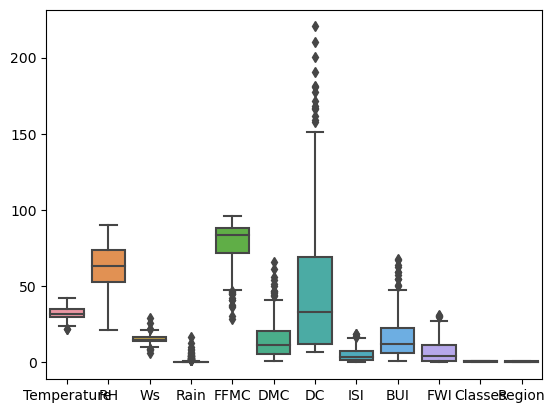

In [209]:
sns.boxplot(df_copy)

In [210]:
df['Classes'] = df['Classes'].str.strip()

<Axes: xlabel='month', ylabel='count'>

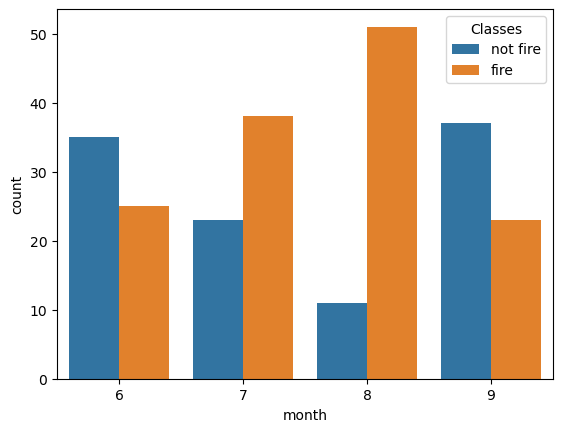

In [211]:
sns.countplot(x = 'month', data = df, hue = 'Classes')

In [212]:
df_copy.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [213]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [214]:
df = df_copy

In [215]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [216]:
#Encoding the categorical data
df['Classes'] = df['Classes'].replace('fire', 1)
df['Classes'] = df['Classes'].replace('not fire', 0)
#I could also use the below code
#df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)


In [217]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [218]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [219]:
#Indepdendent and Dependent Features
X = df.drop(['FWI'], axis = 1)
y = df['FWI']

In [220]:
X.head(), y.head()

(   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
 0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
 1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
 2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
 3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
 4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0,
 0    0.5
 1    0.4
 2    0.1
 3    0.0
 4    0.5
 Name: FWI, dtype: float64)

In [221]:
from sklearn.model_selection import train_test_split


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [223]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [224]:
y_train.shape, y_test.shape

((182,), (61,))

In [225]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

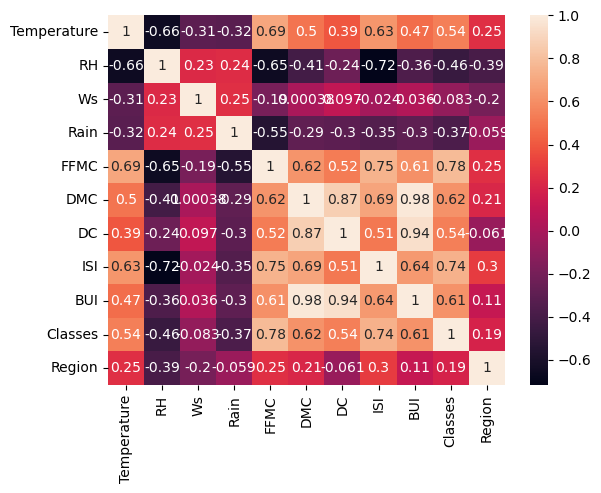

In [226]:
sns.heatmap(X_train.corr(), annot = True)

In [227]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [228]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [229]:
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)

In [230]:
X_train.shape

(182, 9)

# Feature Scaling or Standardization

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
Scaler = StandardScaler()

In [236]:
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [237]:
X_train_scaled, X_test_scaled

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]]),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
        [-1

# Box Plots to understand Effect of Standard Scaler

/var/folders/yx/kk6zb4cn0fx3__0h6_b8_p4w0000gn/T/ipykernel_25941/3421589703.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'Box Plot After Scaling')

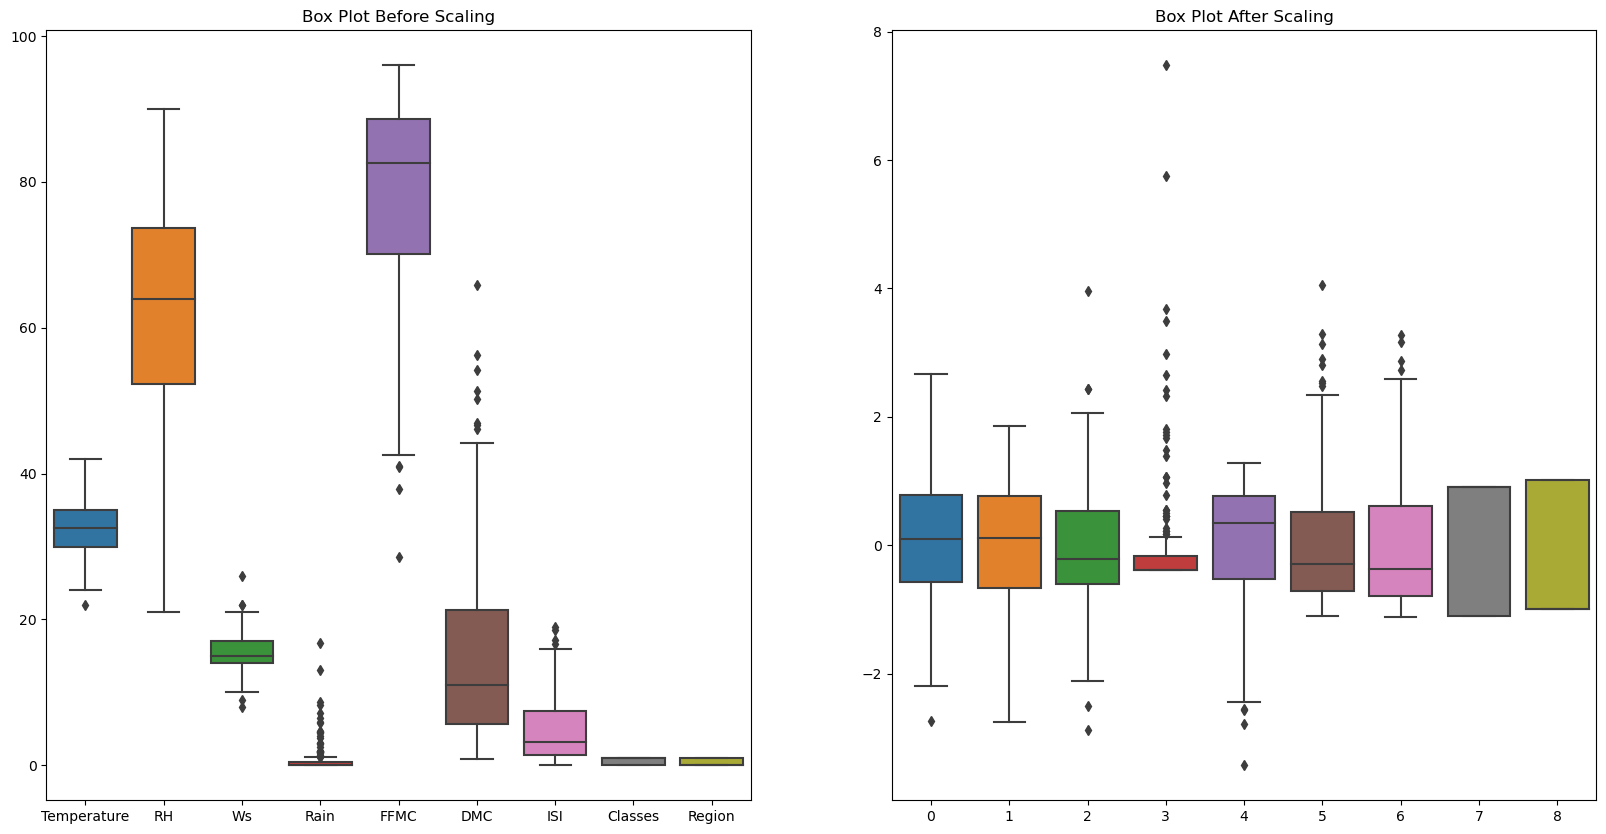

In [243]:
plt.subplots(figsize = (20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.title('Box Plot Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(X_train_scaled)
plt.title('Box Plot After Scaling')

# Linear Regression Model

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [245]:
linear = LinearRegression()

In [246]:
linear.fit(X_train_scaled, y_train)

LinearRegression()

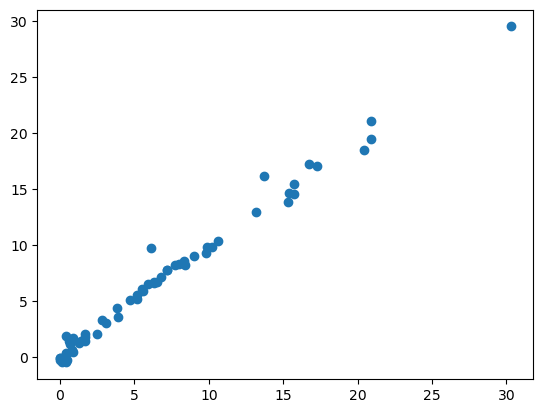

In [251]:
y_pred = linear.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [248]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [249]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.546823646524999
Mean Squared Error: 0.674276687379159
Root Mean Squared Error: 0.8211435242265258
R2 Score: 0.9847657384266951


# Lasso Regression

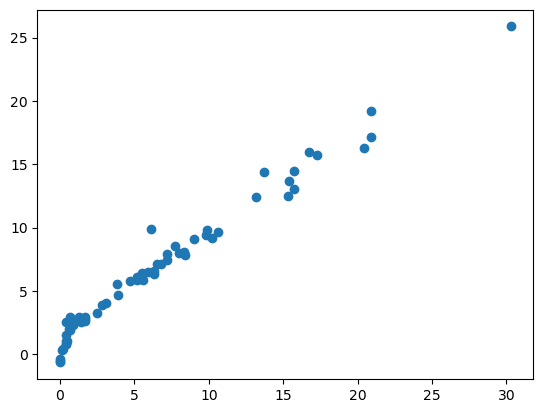

In [253]:
from sklearn.linear_model import Lasso
lassso = Lasso()
lassso.fit(X_train_scaled, y_train)
y_pred = lassso.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [254]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [255]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 1.1331759949144082
Mean Squared Error: 2.248345891897474
Root Mean Squared Error: 1.4994485292591653
R2 Score: 0.9492020263112388


# Lasso with Cross Validation

In [267]:
from sklearn.linear_model import LassoCV
lassoo_cv = LassoCV(cv = 5)

In [271]:
lassoo_cv.fit(X_train_scaled, y_train)
y_pred = lassoo_cv.predict(X_test_scaled)

In [272]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [273]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.6199701158263432
Mean Squared Error: 0.7924995554743626
Root Mean Squared Error: 0.8902244410677358
R2 Score: 0.9820946715928275


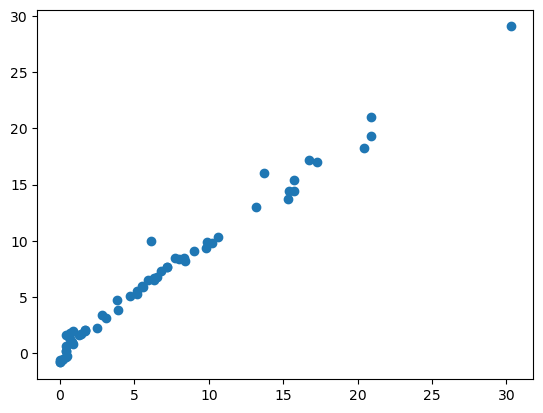

In [274]:
plt.scatter(y_test, y_pred)

# Ridge Regression Model

In [278]:
from sklearn.linear_model import Ridge

In [279]:
ridge = Ridge()

In [280]:
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

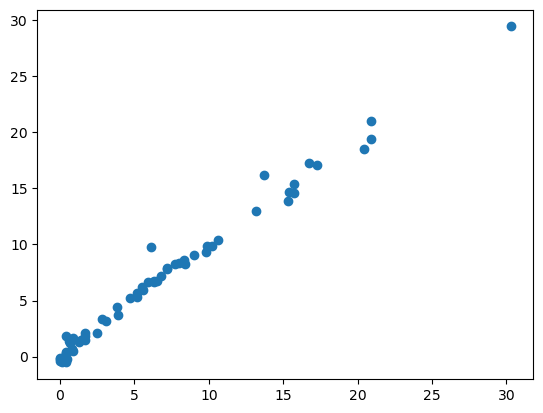

In [281]:
plt.scatter(y_test, y_pred)

In [282]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [283]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.5642305340105711
Mean Squared Error: 0.6949198918152096
Root Mean Squared Error: 0.8336185529456561
R2 Score: 0.9842993364555512


# Ridge Regression with Cross Validation

In [284]:
from sklearn.linear_model import RidgeCV

In [285]:
ridge_cv = RidgeCV(cv = 5)

In [287]:
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

In [ ]:
y_pred = ridge_cv.predict(X_test_scaled)

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

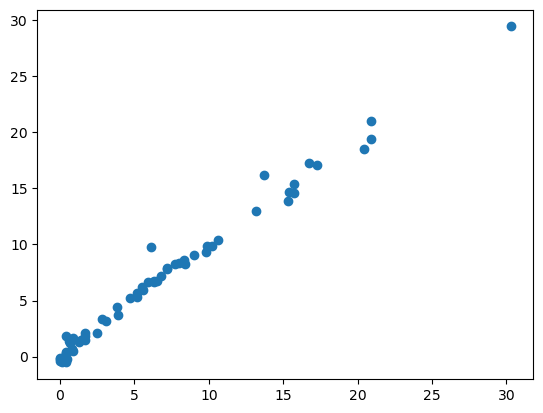

In [289]:
plt.scatter(y_test, y_pred)

In [290]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [291]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.5642305340105711
Mean Squared Error: 0.6949198918152096
Root Mean Squared Error: 0.8336185529456561
R2 Score: 0.9842993364555512


# Elastic Net

In [292]:
from sklearn.linear_model import ElasticNet

In [293]:
Elastic = ElasticNet()

In [294]:
Elastic.fit(X_train_scaled, y_train)

ElasticNet()

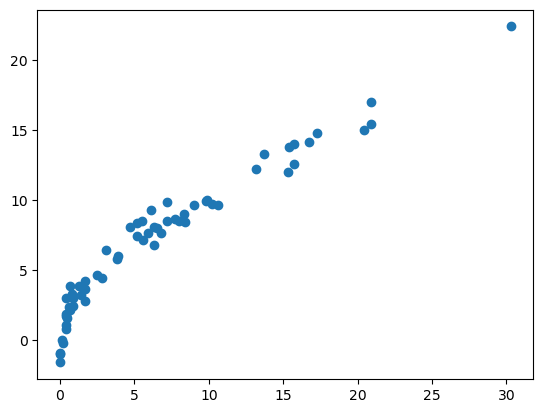

In [296]:
y_pred = Elastic.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [297]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [298]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 1.8822353634896
Mean Squared Error: 5.517251101025224
Root Mean Squared Error: 2.3488829474933874
R2 Score: 0.8753460589519703


In [ ]:
##Pickle the machine learning model with best accuracy and preprocessing model - StandardScaler


In [299]:
Scaler

StandardScaler()

In [301]:
ridge

Ridge()

# Pickling the model

In [307]:
import pickle
pickle.dump(Scaler, open('Scaler.pk1', 'wb'))
pickle.dump(ridge, open('ridge.pk1', 'wb'))